# Imports

Nessa seção, serão realizados as importações das bibliotecas usadas no projeto.

In [ ]:
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from tqdm import tqdm_notebook
from itertools import product

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Dataset

(precisa dar moount no drive antes)

Nessa seção, os dados serão carregados e manipulados com a biblioteca Pandas. Os dados foram retirados de https://www.ncei.noaa.gov/access/monitoring/enso/soi.

Os dados utilizados já estão normalizados e foram convertidos para um arquivo csv. Na conversão, os valores nulos do SOI a partir de Junho de 2023 foram substituídos por 0.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/p1uniasselvi/global_temps.csv")
df = df.dropna()
df = df.astype(int)
df

,Ano,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,J-D,D-N,DJF,MAM,JJA,SON
1,1881,-2,-15,3,5,5,-19,0,-4,-16,-22,-19,-8,-9,-1,-18,4,-8,-19
2,1882,16,13,4,-16,-14,-22,-17,-8,-15,-24,-17,-36,-11,-9,7,-9,-16,-19
3,1883,-3,-37,-13,-19,-18,-8,-8,-14,-23,-12,-24,-11,-18,-2,-34,-17,-1,-2
4,1884,-13,-9,-37,-4,-34,-35,-31,-28,-28,-25,-34,-31,-29,-27,-11,-37,-32,-29
5,1885,-59,-34,-27,-42,-45,-44,-34,-32,-29,-24,-24,-11,-34,-35,-41,-38,-36,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2018,82,85,88,89,83,77,82,77,8,102,83,92,85,85,87,87,79,88
139,2019,93,95,117,102,85,91,94,95,93,101,1,109,98,97,93,101,93,98
140,2020,118,125,117,113,102,92,9,88,99,89,111,81,102,104,117,111,9,99
141,2021,81,64,89,76,79,84,92,82,93,1,94,86,85,85,76,81,86,96


Agora, usaremos a função describe() do Pandas para visualizar as médias, desvios padrão e quartis de cada mês através dos anos.

In [ ]:
df_i = df.set_index('Ano')

In [ ]:
df_i.describe()

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,J-D,D-N,DJF,MAM,JJA,SON
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,6.450704,5.154930,7.971831,6.633803,5.028169,3.359155,3.788732,5.746479,4.190141,6.302817,5.704225,4.394366,5.422535,5.126761,6.542254,4.838028,4.478873,6.781690
std,41.529546,40.133518,41.025497,35.511157,36.263407,35.341965,32.717972,35.355828,34.164586,34.105799,36.077102,38.160720,35.245305,35.428253,39.221253,37.316860,32.789187,34.876503
min,-81.000000,-63.000000,-63.000000,-58.000000,-55.000000,-52.000000,-51.000000,-55.000000,-58.000000,-58.000000,-55.000000,-82.000000,-48.000000,-49.000000,-67.000000,-58.000000,-45.000000,-52.000000
25%,-23.000000,-18.000000,-21.750000,-18.750000,-23.000000,-22.000000,-18.750000,-21.000000,-19.000000,-17.000000,-17.000000,-21.750000,-18.750000,-21.000000,-21.750000,-25.000000,-19.000000,-17.000000
50%,-1.000000,-1.500000,1.000000,-2.000000,-3.000000,-4.000000,-2.500000,-2.000000,-3.000000,1.000000,1.000000,-3.500000,-2.000000,-2.000000,-1.000000,-1.000000,-2.000000,-1.000000
75%,31.000000,22.750000,28.250000,25.500000,26.750000,18.500000,14.500000,20.500000,15.000000,15.000000,14.750000,25.500000,21.750000,19.000000,28.750000,22.000000,14.000000,20.000000
max,118.000000,137.000000,136.000000,113.000000,102.000000,93.000000,94.000000,102.000000,99.000000,109.000000,111.000000,116.000000,102.000000,104.000000,124.000000,114.000000,94.000000,99.000000


In [ ]:
df.tail(5)

,Ano,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,J-D,D-N,DJF,MAM,JJA,SON
138,2018,82,85,88,89,83,77,82,77,8,102,83,92,85,85,87,87,79,88
139,2019,93,95,117,102,85,91,94,95,93,101,1,109,98,97,93,101,93,98
140,2020,118,125,117,113,102,92,9,88,99,89,111,81,102,104,117,111,9,99
141,2021,81,64,89,76,79,84,92,82,93,1,94,86,85,85,76,81,86,96
142,2022,91,9,105,84,84,93,94,96,9,97,73,8,9,9,89,91,94,87


In [ ]:
df2 = df_i.iloc[:,:-6]

In [ ]:
df2

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Ano,,,,,,,,,,,,
1881,-2,-15,3,5,5,-19,0,-4,-16,-22,-19,-8
1882,16,13,4,-16,-14,-22,-17,-8,-15,-24,-17,-36
1883,-3,-37,-13,-19,-18,-8,-8,-14,-23,-12,-24,-11
1884,-13,-9,-37,-4,-34,-35,-31,-28,-28,-25,-34,-31
1885,-59,-34,-27,-42,-45,-44,-34,-32,-29,-24,-24,-11
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,82,85,88,89,83,77,82,77,8,102,83,92
2019,93,95,117,102,85,91,94,95,93,101,1,109
2020,118,125,117,113,102,92,9,88,99,89,111,81


E então será gerado um segundo dataframe com os mesmos valores mas com as linhas invertidas com as colunas. Dessa forma, será mais fácil plotar alguns gráficos na próxima seção.

Após isso, a função describe foi usada para gerar alguns parâmetros sobre o SOI através dos anos.

In [ ]:
df_t = df2.T
# df_t = df_t.rename(columns={'YEAR': 'MONTH'})
df_t.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ano,,,,,,,,
1881,12.0,-7.666667,10.111500,-22.0,-16.75,-6.0,0.75,5.0
1882,12.0,-11.333333,15.299039,-36.0,-18.25,-15.5,-5.00,16.0
1883,12.0,-15.833333,9.133687,-37.0,-20.00,-13.5,-10.25,-3.0
1884,12.0,-25.750000,10.996900,-37.0,-34.00,-29.5,-22.00,-4.0
1885,12.0,-33.750000,12.490906,-59.0,-42.50,-33.0,-26.25,-11.0
...,...,...,...,...,...,...,...,...
2018,12.0,79.000000,23.382200,8.0,80.75,83.0,88.25,102.0
2019,12.0,89.666667,29.208758,1.0,92.50,94.5,101.25,117.0
2020,12.0,95.333333,30.514775,9.0,88.75,100.5,114.00,125.0


Assim, para gerarmos as visualizações, podemos usar um dos três dataframes criados até agora:



*   **df:** dataframe contendo os dados originais
*   **df_i**: dataframe tendo os anos como índice
*   **df_t:** dataframe com as linhas transpostas pelas colunas
*   **df_final:** dataframe com apenas uma coluna

# Análise Exploratória

Nessa seção, a relação de tempo entre os dados será explorada através de visualizações de diferentes tipos de gráficos.

Primeiramente, serão gerados gráficos demonstrando a variação do SOI para cada mês em função dos anos.

In [ ]:
col = list(df2.columns.values)
col

['Jan',
 'Fev',
 'Mar',
 'Abr',
 'Mai',
 'Jun',
 'Jul',
 'Ago',
 'Set',
 'Out',
 'Nov',
 'Dez']

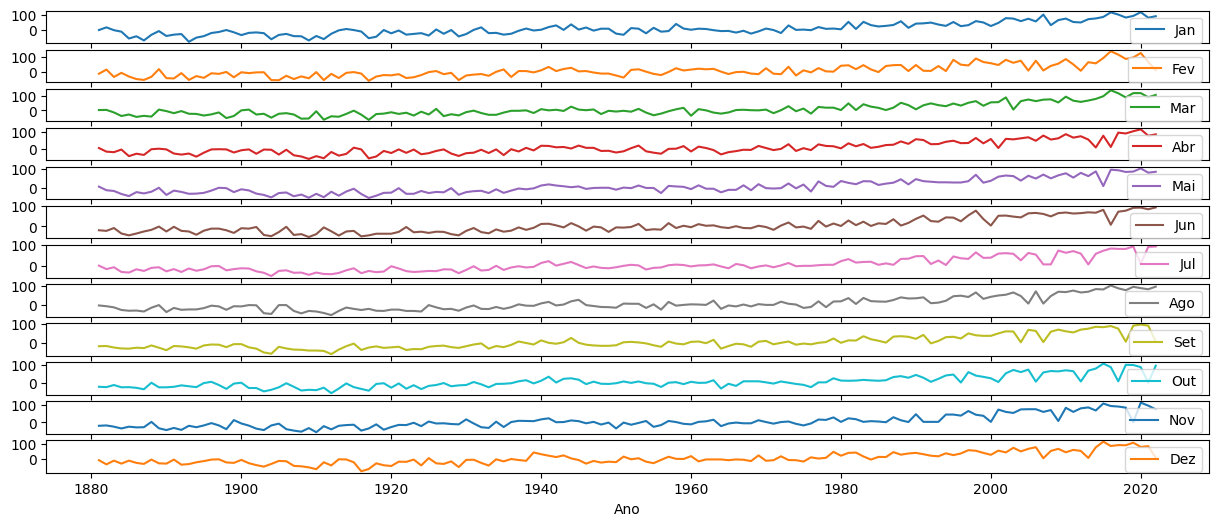

In [ ]:
plot_cols = ['Jan',
 'Fev',
 'Mar',
 'Abr',
 'Mai',
 'Jun',
 'Jul',
 'Ago',
 'Set',
 'Out',
 'Nov',
 'Dez']
plot_features = df2[plot_cols]
plot_features.index = df['Ano']
_ = plot_features.plot(subplots=True, figsize=(15, 6))

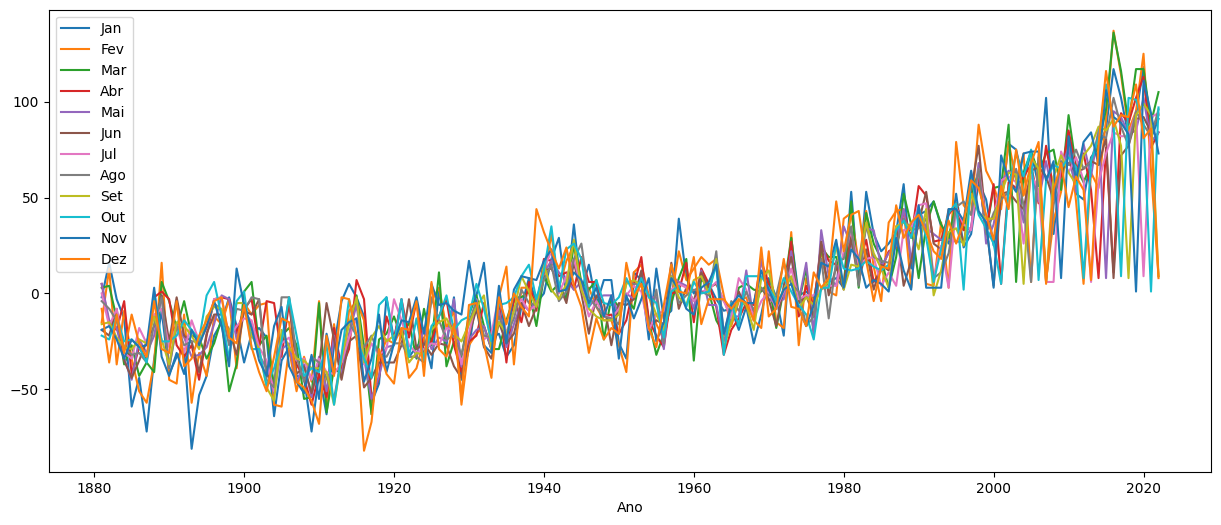

In [ ]:
df2.plot(figsize=(15, 6))
plt.show()

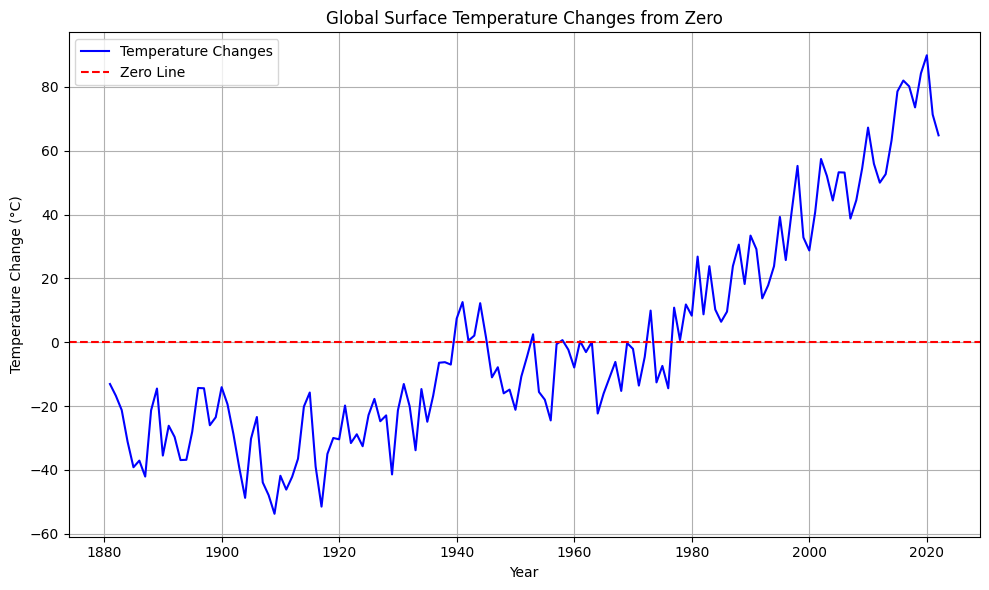

In [ ]:
# Assuming you have a DataFrame called 'df' with columns for each mont# and the index set to the year

# Calculate the mean temperature for each year
yearly_mean = df2.mean(axis=1)

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the yearly mean temperature data, centered around zero
ax.plot(yearly_mean.index, yearly_mean - yearly_mean.mean(), label='Temperature Changes', color='b')

# Customize the graph with labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Temperature Change (°C)')
ax.set_title('Global Surface Temperature Changes from Zero')
ax.axhline(0, color='r', linestyle='--', label='Zero Line')  # Add a red dashed zero line
ax.legend()

# Show the graph or save it as needed
plt.grid(True)
plt.tight_layout()
plt.show()


# Decomposição da Série Temporal



In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [ ]:
print(df2)

      Jan  Fev  Mar  Abr  Mai  Jun  Jul  Ago  Set  Out  Nov  Dez
Ano                                                             
1881   -2  -15    3    5    5  -19    0   -4  -16  -22  -19   -8
1882   16   13    4  -16  -14  -22  -17   -8  -15  -24  -17  -36
1883   -3  -37  -13  -19  -18   -8   -8  -14  -23  -12  -24  -11
1884  -13   -9  -37   -4  -34  -35  -31  -28  -28  -25  -34  -31
1885  -59  -34  -27  -42  -45  -44  -34  -32  -29  -24  -24  -11
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
2018   82   85   88   89   83   77   82   77    8  102   83   92
2019   93   95  117  102   85   91   94   95   93  101    1  109
2020  118  125  117  113  102   92    9   88   99   89  111   81
2021   81   64   89   76   79   84   92   82   93    1   94   86
2022   91    9  105   84   84   93   94   96    9   97   73    8

[142 rows x 12 columns]


In [ ]:


# Assuming you have a DataFrame called 'df' with the given structure

# Set the frequency of the index to 'A' (annual)
df2.index = pd.to_datetime(df2.index, format='%Y')
df2.index.freq = 'A'

# Perform time series decomposition
result = seasonal_decompose(df2, model='additive')

# Access the decomposed components
trend = result.trend
seasonal = result.seasonal
residual = result.resid

# Plot the decomposed components for January as an example
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df2.index, df2['Jan'], label='Original - Jan')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend.index, trend['Jan'], label='Trend - Jan')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal.index, seasonal['Jan'], label='Seasonal - Jan')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual.index, residual['Jan'], label='Residuals - Jan')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


ValueError: ignored

In [ ]:
data = df2

In [ ]:
data.reset_index(inplace=True)

In [ ]:
# Create a list of Portuguese month abbreviations
months = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Create an empty list to store the rows of the new DataFrame
rows = []

In [ ]:


# Iterate through the original DataFrame and create rows for the new DataFrame
for year, row in data.iterrows():
    for month, value in zip(months, row):
        date = pd.to_datetime(f"{month}-{year}", format='%b-%Y')
        rows.append([date, value])

# Create the new DataFrame with a multi-level index
new_df = pd.DataFrame(rows, columns=['Date', 'Value'])
new_df.set_index('Date', inplace=True)

# Display the new DataFrame
print(new_df)


ValueError: ignored

# Modelos

Nessa seção, iremos explorar alguns modelos para séries temporais.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:

# Split data into training and testing sets
train_size = int(len(df2) * 0.8)
train, test = df2.iloc[:train_size], df2.iloc[train_size:]

# Example: Linear Regression for January
X_train = train.iloc[:-1]['Jan'].values.reshape(-1, 1)
y_train = train.iloc[1:]['Jan'].values
X_test = test.iloc[:-1]['Jan'].values.reshape(-1, 1)
y_test = test.iloc[1:]['Jan'].values

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the next year
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE for January: {rmse}')

# Repeat the steps for other months and fine-tune the model as needed

RMSE for January: 36.89065312366887


In [ ]:

# Example: Linear Regression for Fev
X_train = train.iloc[:-1]['Fev'].values.reshape(-1, 1)
y_train = train.iloc[1:]['Fev'].values
X_test = test.iloc[:-1]['Fev'].values.reshape(-1, 1)
y_test = test.iloc[1:]['Fev'].values

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the next year
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE for Fev: {rmse}')

RMSE for Fev: 49.88753700864075


In [ ]:

# Example: Linear Regression for Out
X_train = train.iloc[:-1]['Out'].values.reshape(-1, 1)
y_train = train.iloc[1:]['Out'].values
X_test = test.iloc[:-1]['Out'].values.reshape(-1, 1)
y_test = test.iloc[1:]['Out'].values

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the next year
predictions = model.predict(X_test)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'RMSE for Out: {rmse}')

RMSE for Out: 44.48629192643961


In [ ]:
df.index = pd.to_datetime(df.index, format='%Y')

# Set the frequency to 'A' (annual)
df.index.freq = 'A'


In [ ]:
df2.head(5)

,Ano,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,1881-01-01,-2,-15,3,5,5,-19,0,-4,-16,-22,-19,-8
1,1882-01-01,16,13,4,-16,-14,-22,-17,-8,-15,-24,-17,-36
2,1883-01-01,-3,-37,-13,-19,-18,-8,-8,-14,-23,-12,-24,-11
3,1884-01-01,-13,-9,-37,-4,-34,-35,-31,-28,-28,-25,-34,-31
4,1885-01-01,-59,-34,-27,-42,-45,-44,-34,-32,-29,-24,-24,-11


In [ ]:


# Assuming you have a DataFrame called 'df' with each row for a different year
# and each column for a different month

# Function to difference the data for a specific month
def difference(data, interval=1):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        diff.append(value)
    return pd.Series(diff)

# Iterate through each column (month)
for month in df2.columns:
    # Perform Dickey-Fuller test for the month
    adf_statistic, p_value, _, _, _, _ = adfuller(df2[month])
    if p_value > 0.05:
        print(f'The data for {month} is non-stationary.')
        # Apply differencing to make the data stationary
        df2[month] = difference(df2[month], interval=1)

    # Set the frequency to 'A' (annual)
    df2.index = pd.to_datetime(df.index, format='%Y')
    df2.index.freq = 'A'

    # Split data into training and testing sets
    train_size = int(len(df2) * 0.8)
    train, test = df2.iloc[:train_size], df2.iloc[train_size:]

    # Prepare the training and testing data
    X_train = train.iloc[:-1][month].values.reshape(-1, 1)
    y_train = train.iloc[1:][month].values
    X_test = test.iloc[:-1][month].values.reshape(-1, 1)
    y_test = test.iloc[1:][month].values

    # Create and train the Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions for the next year
    predictions = model.predict(X_test)

    # Calculate RMSE (Root Mean Squared Error)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    print(f'RMSE for {month}: {rmse}')


The data for Jan is non-stationary.


ValueError: ignored

## Média Movel

Primeiramente, vamos usar o modelo de média móvel para suavizar nossa série temporal. Para isso, usaremos uma função auxiliar que executará o modelo de média móvel em uma janela de tempo especificada e plotará a curva suavizada resultante. Para a função, foram usadas as bibliotecas numpy e scikit-learn.

<ipython-input-77-2c2a5b551ced>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g" (-> color=(0.0, 0.5, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(rolling_mean, 'g', label='Tendência de média contínua', color='black')


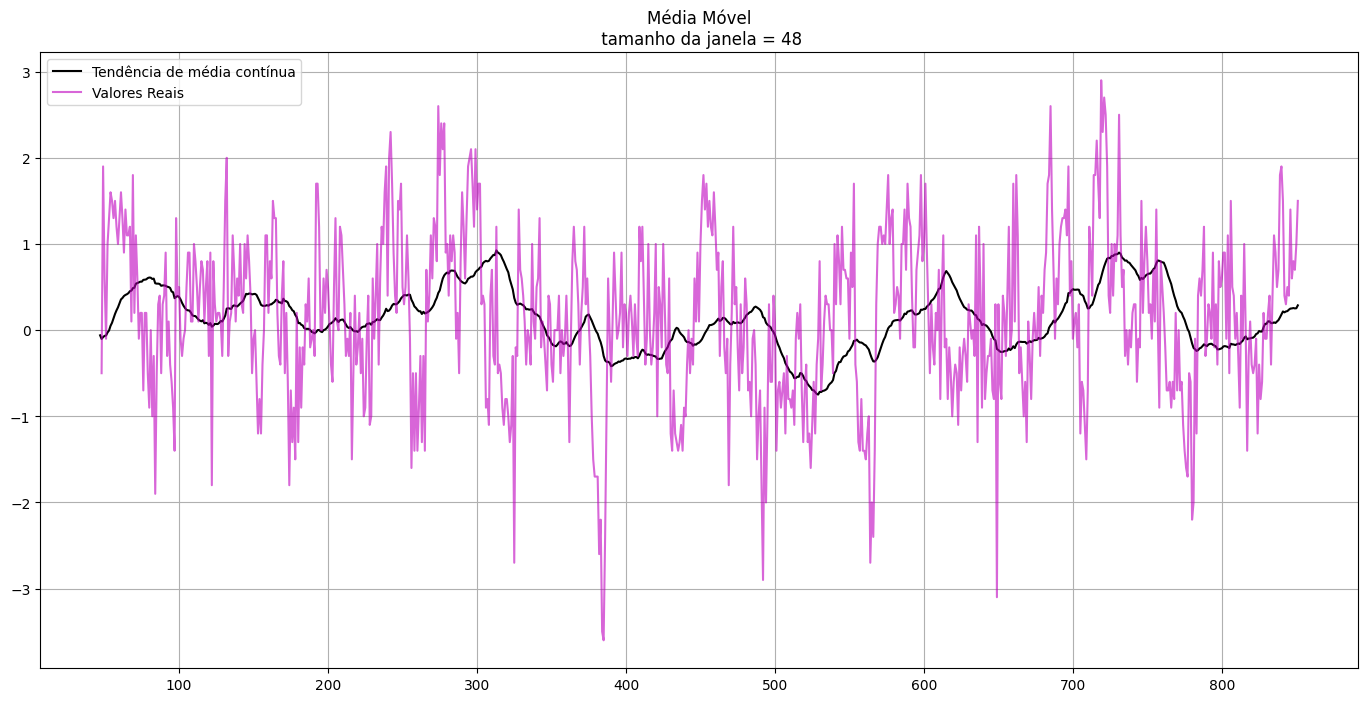

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(17,8))
    plt.title('Média Móvel\n tamanho da janela = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Tendência de média contínua', color='black')

    if plot_intervals:
      mae = mean_absolute_error(series[window:], rolling_mean[window:])
      deviation = np.std(series[window:] - rolling_mean[window:])
      lower_bound = rolling_mean - (mae + scale * deviation)
      upper_bound = rolling_mean + (mae + scale * deviation)
      plt.plot(upper_bound, 'r--', label='Upper / Lower')
      plt.plot(lower_bound, 'r--')

    plt.plot(series[window:], label='Valores Reais', color='m', alpha=0.6)
    plt.legend(loc='best')
    plt.grid(True)

# o tamanho da janela de tempo foi definido para 48 meses, ou seja, 4 anos
plot_moving_average(df_final['SOI'], 48)

## SARIMA

Finalmente, o modelo usado será o SARIMA (Auto-Regressivo Integrado de
Médias Móveis com Sazonalidade).

Primeiro definimos alguns parâmetros e um intervalo de valores para outros parâmetros para gerar uma lista de todas as combinações possíveis de p, q, d, P, Q, D, s.



In [ ]:
#definindo valores iniciais e limites
ps = range(0, 5)
d = 1
qs = range(0, 5)
Ps = range(0, 5)
D = 1
Qs = range(0, 5)
s = 5

#criando lista com todas as combinações possíveis de parâmetros
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

625

Agora temos 625 combinações diferentes de parâmetros. Tentaremos cada combinação e treinaremos o SARIMA com cada uma delas para encontrar o modelo com melhor desempenho. A otimização será feita com a função abaixo, enquanto uma função do statsmodels será responsável por rodar o modelo SARIMA.

In [ ]:
# treinando diversos modelos SARIMA para encontrar a melhor combinação de parâmetros
def optimize_SARIMA(parameters_list, d, D, s):
    results = []
    best_aic = float('inf')

    for param in tqdm_notebook(parameters_list):
        try: model = sm.tsa.statespace.SARIMAX(data, order=(param[0], d, param[1]),
                                               seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue

        aic = model.aic

        # salvar melhor modelo a parâmetros
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    #classificando em ordem crescente, sendo o menor AIC o melhor
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)

    return result_table

result_table = optimize_SARIMA(parameters_list, d, D, s)

#definindo como parâmetros os que fornecem o menor AIC
p, q, P, Q = result_table.parameters[0]

<ipython-input-108-c53d63609ef1>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


  0%|          | 0/625 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

Feito isso, imprimimos um resumo do melhor modelo, com os parâmetros otimizados:

In [ ]:
best_model = sm.tsa.statespace.SARIMAX(data, order=(p, d, q),
                                       seasonal_order=(P, D, Q, s)).fit(disp=-1)

print(best_model.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                                 SOI   No. Observations:                  852
Model:             SARIMAX(4, 1, 4)x(0, 1, [1], 5)   Log Likelihood                -901.228
Date:                             Wed, 12 Jul 2023   AIC                           1822.456
Time:                                     04:19:21   BIC                           1869.861
Sample:                                          0   HQIC                          1840.619
                                             - 852                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9366      0.106     -8.833      0.000      -1.144      -0.729
ar.L2          0.3109      

## Outros

Nessa seção, serão testados outros modelos para o conjunto de dados fornecidos, utilizando o TensorFlow e outras funções prontas que não estão devidamente comentadas. Essa seção final foi usada somente como experimentação.

In [ ]:
df = df_final
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

In [ ]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [ ]:
w2 = WindowGenerator(input_width=73, label_width=1, shift=24,
                     label_columns=['SOI'])
w2

Total window size: 97
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Label indices: [96]
Label column name(s): ['SOI']

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [ ]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 97, 1)
Inputs shape: (3, 73, 1)
Labels shape: (3, 1, 1)


In [ ]:
w2.example = example_inputs, example_labels

In [ ]:
def plot(self, model=None, plot_col='SOI', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Anos')

WindowGenerator.plot = plot

In [ ]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [ ]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    result = next(iter(self.train))
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [ ]:
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['SOI'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['SOI']

In [ ]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 1, 1)
Labels shape (batch, time, features): (32, 1, 1)


In [ ]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}
num_features = df.shape[1]

In [ ]:
baseline = Baseline(label_index=column_indices['SOI'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

6/6 [==============================] - 1s 7ms/step - loss: 0.7985 - mean_absolute_error: 0.6751


In [ ]:
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1,
    label_columns=['SOI'])

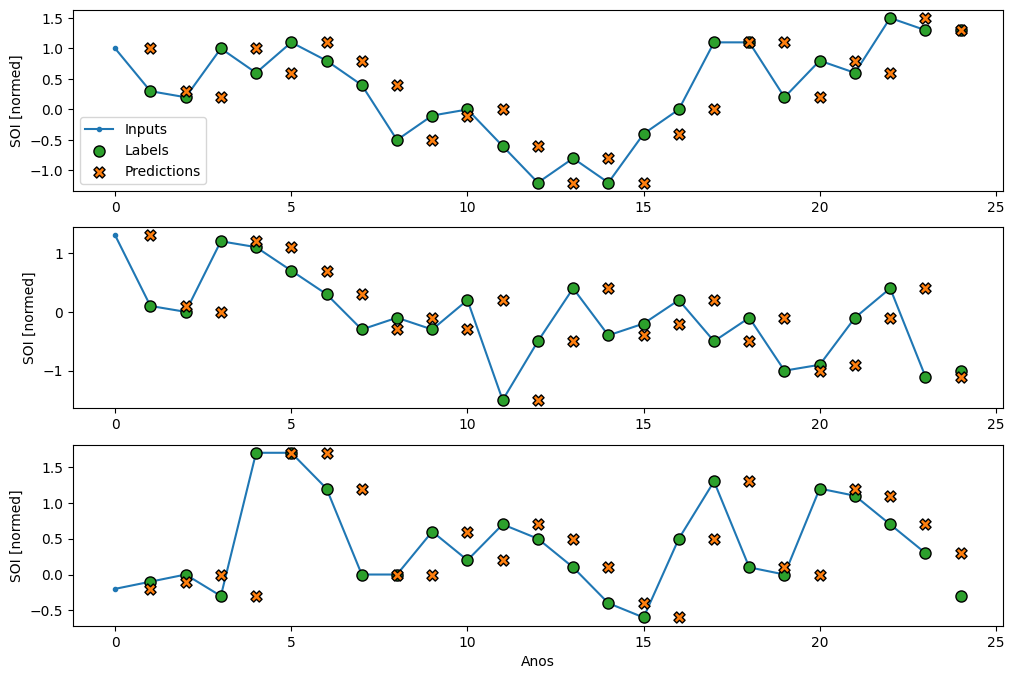

In [ ]:
wide_window.plot(baseline)

In [ ]:
MAX_EPOCHS = 20

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [ ]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [ ]:
history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

5/5 [==============================] - 0s 6ms/step - loss: 0.5750 - mean_absolute_error: 0.5780


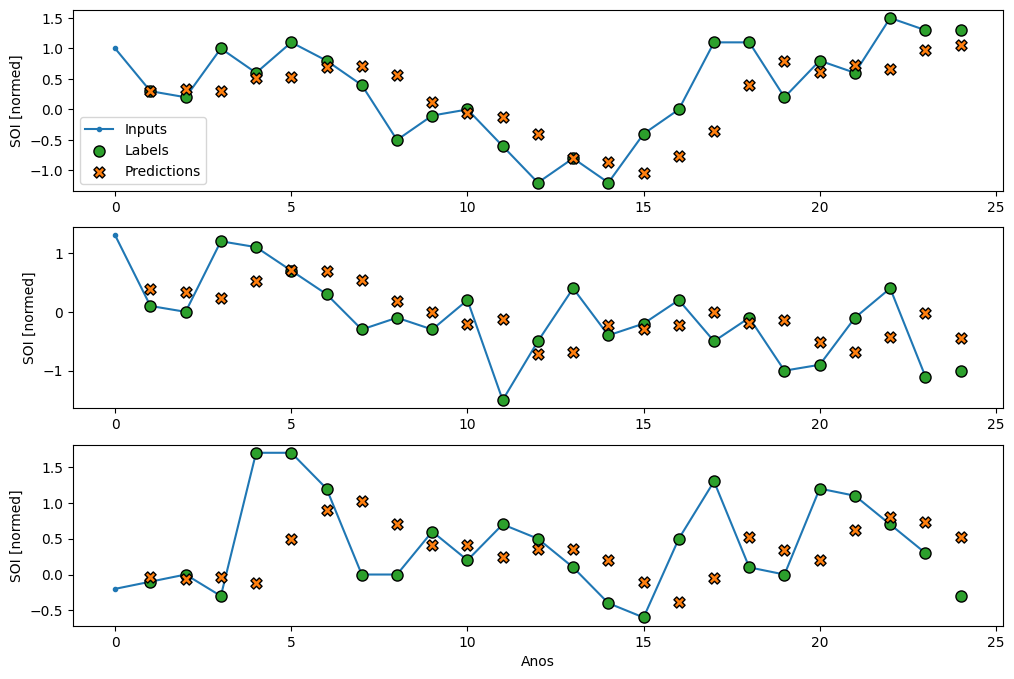

In [ ]:
wide_window.plot(lstm_model)

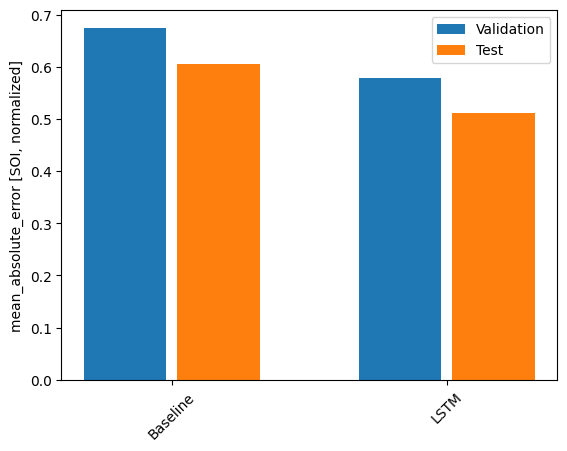

In [ ]:
# comparando os modelos do tensorflow
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [SOI, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()